<h1> Experiment reflection against photon frequency </h1>

In [1]:
#General imports
resol = 300
import matplotlib.pyplot as plt
import pandas as pd

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "axes.linewidth": 0.7,
    "xtick.major.width": 0.6,
    "ytick.major.width": 0.6,
})

import sys
import numpy as np
from pathlib import Path
pi = np.pi

project_root = Path().resolve().parents[1]
sys.path.append(str(project_root))

#Local imports
from single_photon_renormalization.scripts_experiments.reflection_vs_frequency import run_reflection_vs_frequency

<h2> Execute the experiment </h2>

To assess the impact of the frequency window, we run the experiment six times. Each experiment corresponds to a given frequency window $[\Lambda_{\rm IR}, \Lambda_{\rm UV}]$

In [2]:
#Parameters of the simulation

param_photon_bis = {'delta_k': 0.05*np.pi, 'x_0': -25}  #the photon frequency will be varied in this experiment

param_cavity = {'omega_0': 10*np.pi, 'gamma': np.pi, 'L': 100}

param_time_evol = {'T': 50, 'dt': 0.01}

#Define an array of frequencies around the cavity bare esonance
nb_freq = 15
omega_p_tab = np.linspace(param_cavity['omega_0'] - param_cavity['gamma'], param_cavity['omega_0'] + param_cavity['gamma'], nb_freq)

#Assess the curve of reflection vs frequency of different frequency windows
frequency_windows = [
    (0, 2*param_cavity['omega_0']),
    (0, 1.5*param_cavity['omega_0']),
    (0, 1.25*param_cavity['omega_0']),
    (param_cavity['omega_0'] - 4*param_cavity['gamma'], param_cavity['omega_0'] + 4*param_cavity['gamma']),
    (param_cavity['omega_0'] - 3*param_cavity['gamma'], param_cavity['omega_0'] + 3*param_cavity['gamma']),
    (param_cavity['omega_0'] - 2*param_cavity['gamma'], param_cavity['omega_0'] + 2*param_cavity['gamma'])
]

Run the experiment 6 times for each frequency window

In [3]:
for i in range(len(frequency_windows)):
    index_experiment = i+1
    print("Running frequency window number ", index_experiment, " out of ", len(frequency_windows))
    cutoffs = {'ir_cutoff': frequency_windows[i][0], 'uv_cutoff': frequency_windows[i][1]}
    #Run the experiment

    frequency_values, final_reflection_tab = run_reflection_vs_frequency(param_photon_bis, param_cavity, param_time_evol, omega_p_tab, cutoffs, 
                                                                         index_experiment=index_experiment, store_results=True, progress=True)

Running frequency window number  1  out of  6


100%|██████████| 15/15 [00:12<00:00,  1.23it/s]


Running frequency window number  2  out of  6


100%|██████████| 15/15 [00:09<00:00,  1.52it/s]


Running frequency window number  3  out of  6


100%|██████████| 15/15 [00:08<00:00,  1.72it/s]


Running frequency window number  4  out of  6


100%|██████████| 15/15 [00:06<00:00,  2.26it/s]


Running frequency window number  5  out of  6


100%|██████████| 15/15 [00:05<00:00,  2.62it/s]


Running frequency window number  6  out of  6


100%|██████████| 15/15 [00:04<00:00,  3.10it/s]


<h2> Plot the results </h2>

Load the data

In [42]:
index_experiment = 6
ir_cutoff = frequency_windows[index_experiment-1][0]
uv_cutoff = frequency_windows[index_experiment-1][1]

data_file = f"../results/csv_files/reflection_vs_frequency_{index_experiment}.csv"
df = pd.read_csv(data_file)
photon_frequency_tab = df['photon_frequency_tab'].to_numpy()
final_reflection_tab = df['final_reflection_tab'].to_numpy()

Generate theoretical bare curve (prediction from $\omega_0$ and $\gamma$) and physical curve (prediction from $\omega_A$ and $\Gamma$)

In [43]:
frequency_tab_theory = np.linspace(param_cavity['omega_0'] - param_cavity['gamma'], param_cavity['omega_0'] + param_cavity['gamma'], 100)

#Bare prediction
R_theory_bare = 1 / (1 + ((frequency_tab_theory - param_cavity['omega_0'])/ (param_cavity['gamma']/2))**2)

#Physical prediction with Lamb shift and renormalized decay rate
prefactor = 1/(1+param_cavity['gamma']/(2*pi)*(1/(ir_cutoff - param_cavity['omega_0']) - 1/(uv_cutoff - param_cavity['omega_0'])))
omega_A = param_cavity['omega_0'] - param_cavity['gamma'] / (2*pi) * np.log((uv_cutoff-param_cavity['omega_0'])/(param_cavity['omega_0'] - ir_cutoff)) * prefactor
Gamma = param_cavity['gamma'] * prefactor

R_theory_physical = 1 / (1 + ((frequency_tab_theory - omega_A)/ (Gamma/2))**2)

Create the figure

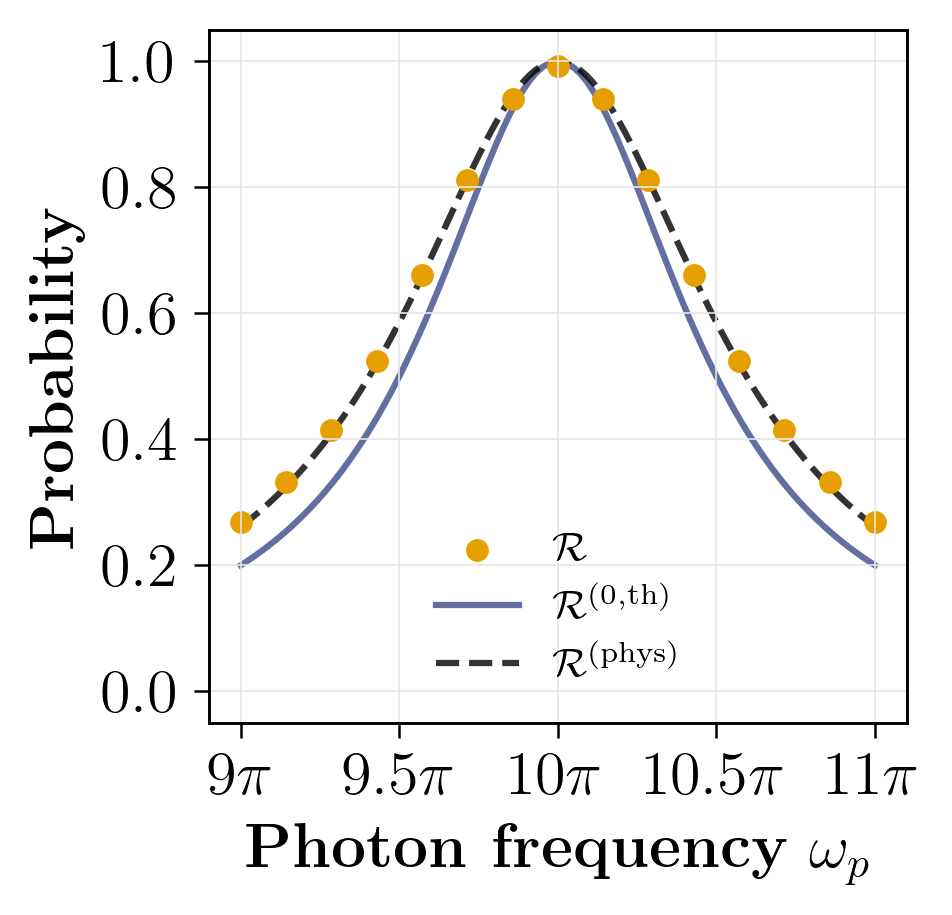

In [45]:
show_bare_curve = True
show_physical_curve = True

# Création de la figure
fig, ax = plt.subplots(figsize=(3, 3), dpi=300)

color_bare = "#3E4A89"
color_data = "#E69F00"

#data points
ax.scatter(photon_frequency_tab, final_reflection_tab, label=r'$\mathcal{R}$', color=color_data, s=20)

# Theoretical curves
if show_bare_curve and not show_physical_curve: 
    ax.plot(frequency_tab_theory, R_theory_bare, color=color_bare, alpha=0.8, zorder = -1, label=r'$\mathcal{R}^{(\rm th)}$')
if show_bare_curve and show_physical_curve:
    #small label change for the bare curve in this context 
    ax.plot(frequency_tab_theory, R_theory_bare, color=color_bare, alpha=0.8, zorder = -1, label=r'$\mathcal{R}^{(0, \rm th)}$')
    ax.plot(frequency_tab_theory, R_theory_physical, color='black', linestyle='--', alpha=0.8, zorder = -1, label=r'$\mathcal{R}^{(\rm phys)}$')


# Labels, limites et grille
ax.set_xlabel(r'\textbf{Photon frequency} $\omega_p$', fontsize=10)
ax.set_xticks([param_cavity['omega_0'] - param_cavity['gamma'], param_cavity['omega_0'] - param_cavity['gamma']/2, param_cavity['omega_0'], param_cavity['omega_0'] + param_cavity['gamma']/2, param_cavity['omega_0'] + param_cavity['gamma']])
ax.set_xticklabels([r"$9\pi$",r"$9.5\pi$",r"$10\pi$",r"$10.5\pi$",r"$11\pi$"])

ax.set_ylabel(r'\textbf{Probability}', fontsize=10)
ax.set_ylim(-0.05, 1.05)
ax.grid(color='0.9', linestyle='-', linewidth=0.4)

# Légende sobre
ax.legend(prop={'size': 10}, loc="lower center", frameon=False)

#font size
for item in [ax.xaxis.label, ax.yaxis.label]:
    item.set_fontsize(15)

for item in (ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(15)

if show_bare_curve and not show_physical_curve:
    plt.savefig("../results/fig/reflection_multi_cutoff_experiment_"+str(index_experiment)+".pdf", bbox_inches="tight")
if show_bare_curve and show_physical_curve:
    plt.savefig("../results/fig/reflection_multi_cutoff_experiment_adjusted_"+str(index_experiment)+".pdf", bbox_inches="tight")

plt.show()